# Tomografia komputerowa

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os.path
from ipywidgets import IntText, interact, Checkbox, Text, VBox, fixed, IntSlider


from ct.ct import CT 
from fmng.dicom import *
from fmng.loader import *
from gui.widgets import *
from gui.vbox_styles import * 

# Menu
### Enter the CT configuration parameters

In [2]:
VBox([filename, steps, number_of_detectors, detector_distance, interactive, convolute])

### Load original picture for screening

In [3]:
ext = filename.value.split('.')[-1]

if ext == 'dcm':
    ds = load_dicom_file(filename.value)
    image = ds.pixel_array
elif ext in ('jpg', 'bmp', 'png'):
    image = load_image(filename.value)
    
print(image)

FileNotFoundError: 

### Run the CT scan

In [4]:
ct = CT(image, steps.value, number_of_detectors.value, detector_distance.value, interactive.value, convolute.value)

sinogram, reconstructed_image = ct.run()

if interactive.value:
    sinograms, results = ct.get_frames()

AttributeError: 'NoneType' object has no attribute 'shape'

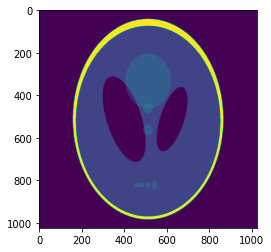

In [26]:
# plt.imshow(reconstructed_image)
plt.imshow(image)

### Interactive image viewer

In [5]:
interact(interactive_imgs, image=fixed(image), results=fixed(results), sinograms=fixed(sinograms), x=IntSlider(min=0, max=steps.value-1, step=90, value=0));

NameError: name 'results' is not defined

### Validate with RMSE

In [9]:
rmse(image, reconstructed_image)

62.632210283318386

### Save image to a DICOM file with additional data

In [ ]:
VBox([save_filename, patient_name, patient_id, image_comments])

In [ ]:
patient_data = {
    "PatientName": patient_name.value,
    "PatientID": patient_id.value,
    "ImageComments": image_comments.value
}

save_as_dicom(save_filename.value, reconstructed_image, patient_data)

### Load image from a DICOM file

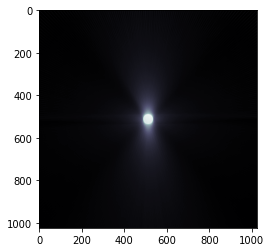

In [14]:
ds = load_dicom_file(save_filename.value)
img = ds.pixel_array
plt.imshow(img, cmap='bone')

In [15]:
patient_summary(ds)

Imię i naziwsko:  Adam Kowalski
ID pacjenta:  123456
Komentarz:  Wedlug analizy tomografii komputerowej pacjent doznal ciezkiego stluczenia czaszki
